In [1]:
import pandas as pd
import pandas as pd

## 1. 데이터 적재

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 2. 데이터 탐색

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

20,640개의 데이터  
ocean_proximity 컬럼은 문자열 -> 인코딩 필요 (숫자로 변환)  
total_bedrooms 에 NaN 값 존재 -> 결측치 처리 필요  

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE4892CC88>,
      dtype=object)

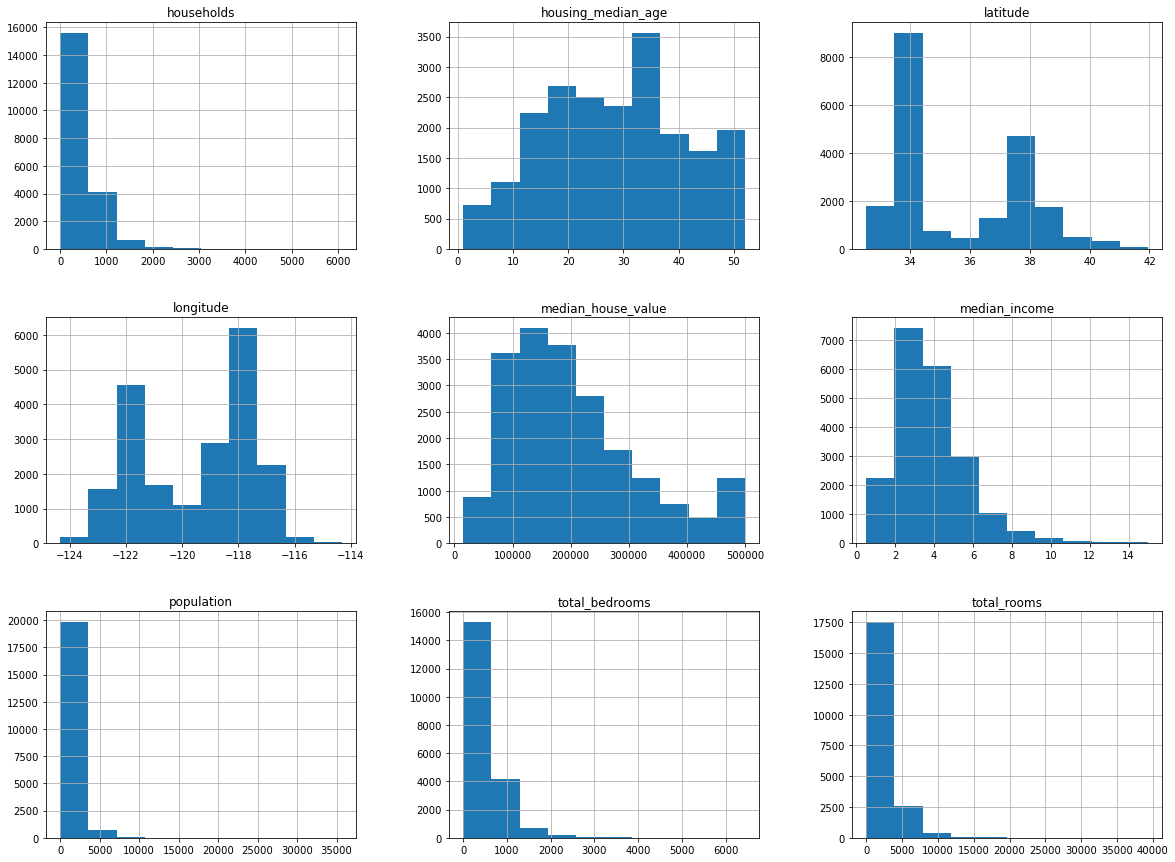

In [10]:
housing.hist(bins=10, figsize=(20,15))
# 분포가 잘 안 보여서, 세분화해서 보자 (아래: bins 증가)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE4B467048>,
      dtype=object)

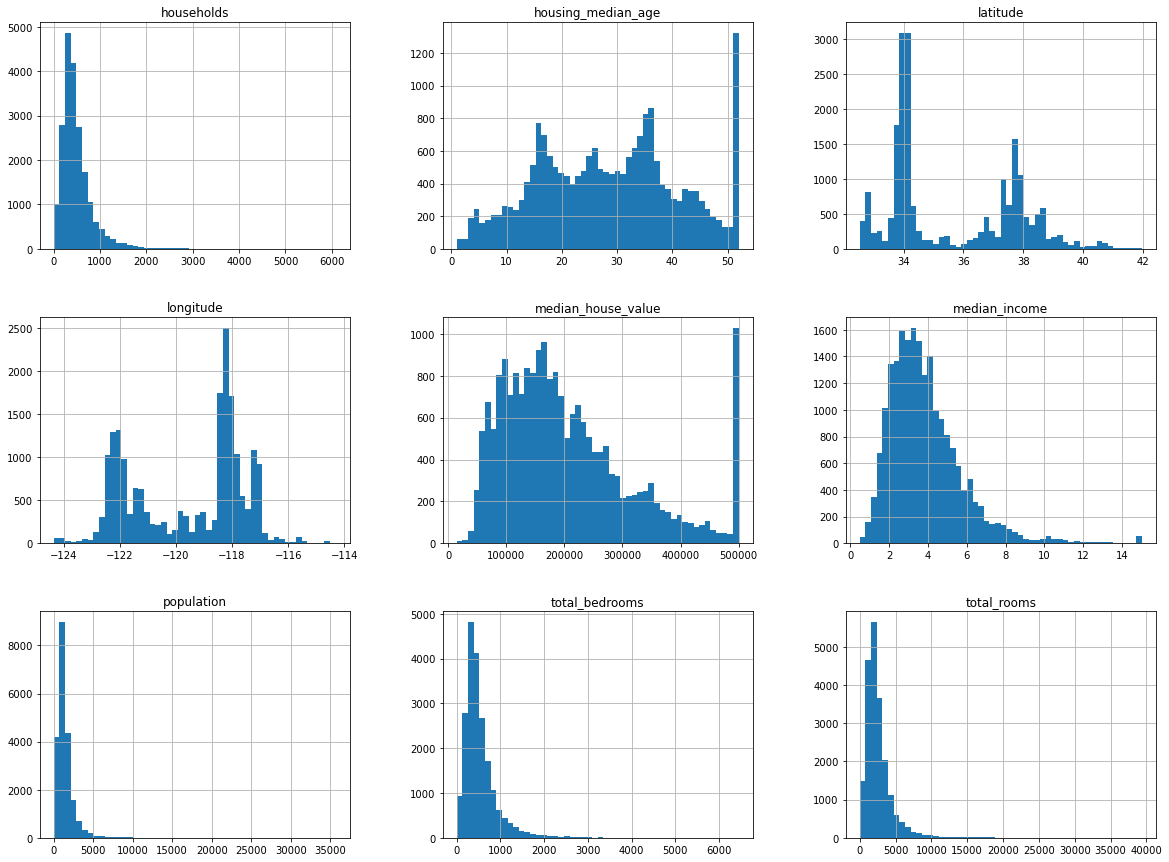

In [11]:
housing.hist(bins=50, figsize=(20,15))

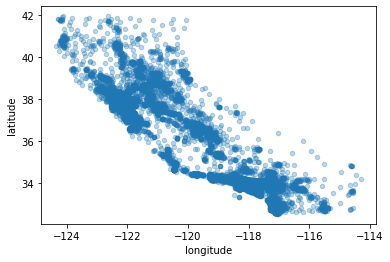

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3)

In [13]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

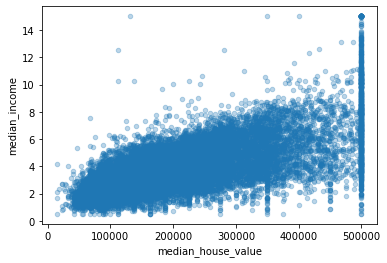

In [14]:
housing.plot(kind='scatter', x='median_house_value', y='median_income', alpha=0.3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE4B3D7748>,
      dtype=object)

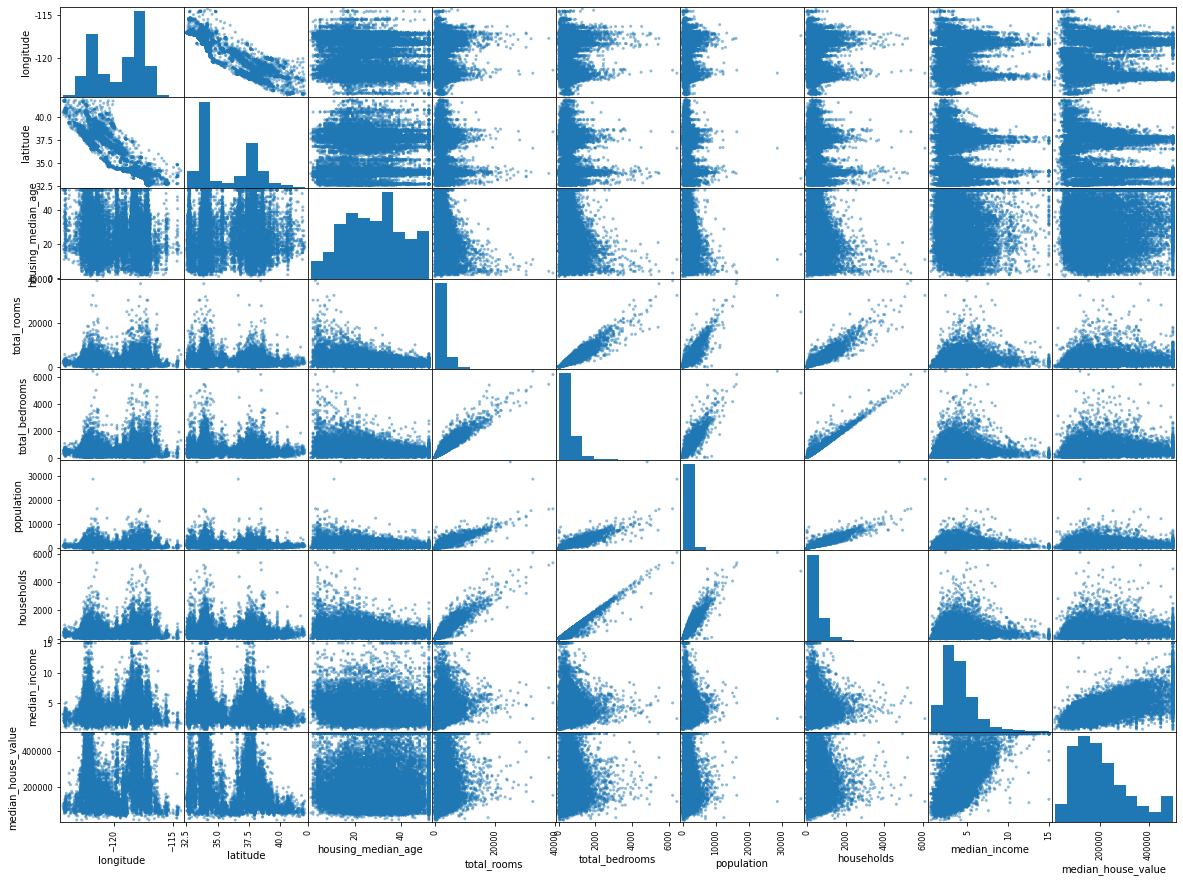

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing, figsize=(20, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE50526BA8>,
      dtype=object)

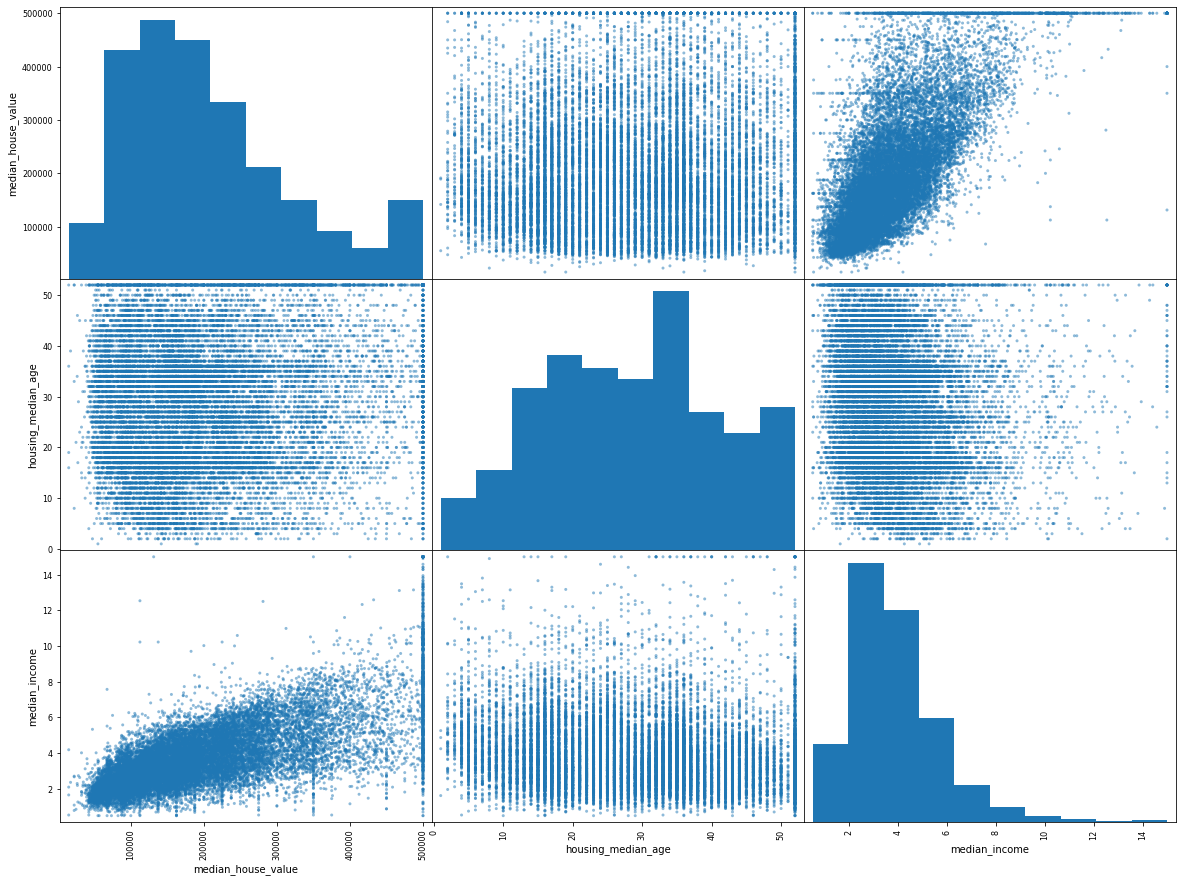

In [16]:
scatter_matrix(housing[['median_house_value', 'housing_median_age', 'median_income']],
              figsize=(20,15))

## 3. 데이터 전처리

1. NaN 결측치 처리  
1) NaN 값을 가진 row 삭제 (NaN값을 가진 row가 매우 적을 때)  
housing[~housing.total_bedrooms.isnull()]  
housing[housing.total_bedrooms.notnull()]  
2) NaN값을 가진 column 삭제  
(해당 컬럼이 무의미하다고 판단하거나, NaN값이 너무 많은 경우)  
housing.drop('total_bedrooms', axis=1)  
3) NaN값을 특정 값으로 치환 (fillna())  
치환하는 값=0, -99 (원래 값의 범위를 벗어나는 특정 값), 평균, 중위값, 최빈값  
housing.total_bedrooms.fillna(housing.total_bedrooms.median())  

In [17]:
# total_rooms와 total_bedrrooms의 비율로 결측치를 채워 넣기
room_ratio = (housing.total_bedrooms/housing.total_rooms).mean()

In [18]:
null_idx = housing[housing.total_bedrooms.isnull()].index

In [19]:
housing.total_bedrooms.fillna(round(housing.total_rooms * room_ratio), inplace=True)

In [20]:
null_idx

Int64Index([  290,   341,   538,   563,   696,   738,  1097,  1350,  1456,
             1493,
            ...
            19932, 19959, 20046, 20069, 20125, 20267, 20268, 20372, 20460,
            20484],
           dtype='int64', length=207)

In [21]:
housing.iloc[null_idx]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,268.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,211.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,1098.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,190.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,159.0,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,771.0,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,510.0,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,908.0,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,1174.0,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [22]:
# 2) ocean_proximity 인코딩 (문자열->숫자형)
housing = pd.get_dummies(housing)

In [23]:
# 3) 추가적인 전처리
# 보다 의미 있는 컬럼으로 변경
housing['rooms_per_hh'] = housing.total_rooms / housing.households
housing['bedrooms_per_hh'] = housing.total_bedrooms / housing.households
housing['population_per_hh'] = housing.population / housing.households

In [24]:
# 기존 컬럼 삭제
housing.drop(['total_rooms', 'total_bedrooms', 'population'],
            axis=1, inplace=True)

In [25]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
rooms_per_hh                  0.151948
ocean_proximity_NEAR OCEAN    0.141862
housing_median_age            0.105623
households                    0.065843
ocean_proximity_ISLAND        0.023416
population_per_hh            -0.023737
bedrooms_per_hh              -0.044737
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

In [29]:
# housing.housing_median_age.value_counts().sort_index() # housing_median_age가 52인 row 삭제
# housing.median_house_value.value_counts() # median_house_value가 50001인 row 삭제

del_flag = (housing.housing_median_age != housing.housing_median_age.max()) & \
                (housing.median_house_value != housing.median_house_value.max())

In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   households                  20640 non-null  float64
 4   median_income               20640 non-null  float64
 5   median_house_value          20640 non-null  float64
 6   ocean_proximity_<1H OCEAN   20640 non-null  uint8  
 7   ocean_proximity_INLAND      20640 non-null  uint8  
 8   ocean_proximity_ISLAND      20640 non-null  uint8  
 9   ocean_proximity_NEAR BAY    20640 non-null  uint8  
 10  ocean_proximity_NEAR OCEAN  20640 non-null  uint8  
 11  rooms_per_hh                20640 non-null  float64
 12  bedrooms_per_hh             20640 non-null  float64
 13  population_per_hh           206

In [31]:
housing = housing[del_flag]

In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18572 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   18572 non-null  float64
 1   latitude                    18572 non-null  float64
 2   housing_median_age          18572 non-null  float64
 3   households                  18572 non-null  float64
 4   median_income               18572 non-null  float64
 5   median_house_value          18572 non-null  float64
 6   ocean_proximity_<1H OCEAN   18572 non-null  uint8  
 7   ocean_proximity_INLAND      18572 non-null  uint8  
 8   ocean_proximity_ISLAND      18572 non-null  uint8  
 9   ocean_proximity_NEAR BAY    18572 non-null  uint8  
 10  ocean_proximity_NEAR OCEAN  18572 non-null  uint8  
 11  rooms_per_hh                18572 non-null  float64
 12  bedrooms_per_hh             18572 non-null  float64
 13  population_per_hh           185

## 4. 학습용/테스트용 데이터 분리

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_features = housing.drop('median_house_value', axis=1)
y_target = housing.median_house_value
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=100)

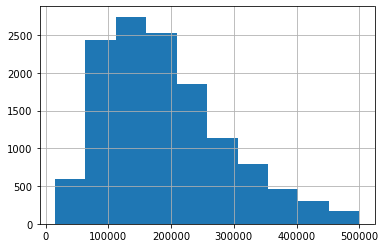

In [35]:
y_train.hist()

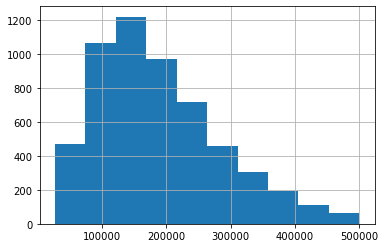

In [39]:
y_test.hist()

train, test 랜덤으로 split이므로 분포는 비슷할 것임

In [36]:
# median_income 분포에 맞춰서 train/test 분리
income_cat = pd.qcut(housing.median_income, 10)    # 10단계로 나눠서
income_cat

0         (5.808, 15.0]
1         (5.808, 15.0]
8        (1.897, 2.331]
15       (1.897, 2.331]
18       (1.897, 2.331]
              ...      
20635    (0.499, 1.897]
20636    (2.331, 2.704]
20637    (0.499, 1.897]
20638    (0.499, 1.897]
20639    (2.331, 2.704]
Name: median_income, Length: 18572, dtype: category
Categories (10, interval[float64]): [(0.499, 1.897] < (1.897, 2.331] < (2.331, 2.704] < (2.704, 3.094] ... (3.867, 4.325] < (4.325, 4.946] < (4.946, 5.808] < (5.808, 15.0]]

In [37]:
from sklearn.preprocessing import LabelEncoder
housing['income_cat'] = LabelEncoder().fit_transform(income_cat)

In [38]:
housing.income_cat.value_counts()

3    1862
7    1859
5    1859
9    1858
2    1858
0    1858
6    1857
1    1857
8    1853
4    1851
Name: income_cat, dtype: int64

In [40]:
housing = housing.reset_index()

In [41]:
housing.drop('index', axis=1, inplace=True)

In [42]:
housing

,longitude,latitude,housing_median_age,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_hh,bedrooms_per_hh,population_per_hh,income_cat
0,-122.23,37.88,41.0,126.0,8.3252,452600.0,0,0,0,1,0,6.984127,1.023810,2.555556,9
1,-122.22,37.86,21.0,1138.0,8.3014,358500.0,0,0,0,1,0,6.238137,0.971880,2.109842,9
2,-122.26,37.84,42.0,595.0,2.0804,226700.0,0,0,0,1,0,4.294118,1.117647,2.026891,1
3,-122.26,37.85,50.0,264.0,2.1250,140000.0,0,0,0,1,0,4.242424,1.071970,2.640152,1
4,-122.26,37.84,50.0,419.0,1.9911,158700.0,0,0,0,1,0,5.343675,1.085919,2.362768,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18567,-121.09,39.48,25.0,330.0,1.5603,78100.0,0,1,0,0,0,5.045455,1.133333,2.560606,0
18568,-121.21,39.49,18.0,114.0,2.5568,77100.0,0,1,0,0,0,6.114035,1.315789,3.122807,2
18569,-121.22,39.43,17.0,433.0,1.7000,92300.0,0,1,0,0,0,5.205543,1.120092,2.325635,0
18570,-121.32,39.43,18.0,349.0,1.8672,84700.0,0,1,0,0,0,5.329513,1.171920,2.123209,0


In [43]:
from sklearn.model_selection import StratifiedShuffleSplit
st = StratifiedShuffleSplit(test_size=0.3)
for train_idx, test_idx in st.split(housing, housing.income_cat):
    train_set = housing.loc[train_idx]
    test_set = housing.loc[test_idx]

In [44]:
len(train_set)

13000

In [45]:
len(test_set)

5572

In [46]:
train_set.income_cat.value_counts()

3    1303
7    1301
5    1301
2    1301
0    1301
6    1300
9    1300
1    1300
8    1297
4    1296
Name: income_cat, dtype: int64

In [47]:
train_set.drop('income_cat', axis=1, inplace=True)
test_set.drop('income_cat', axis=1, inplace=True)

In [48]:
X_train = train_set.drop('median_house_value', axis=1)
X_test = test_set.drop('median_house_value', axis=1)
y_train = train_set.median_house_value
y_test = test_set.median_house_value

## 5. 모델 선택과 훈련 및 평가

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [51]:
X_train.head(20)

,longitude,latitude,housing_median_age,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_hh,bedrooms_per_hh,population_per_hh
15767,-121.90,37.27,33.0,588.0,5.0714,1,0,0,0,0,5.799320,0.991497,2.957483
1646,-120.98,38.68,5.0,900.0,3.2964,0,1,0,0,0,5.344444,1.010000,2.491111
6478,-118.20,33.99,30.0,464.0,2.5510,1,0,0,0,0,3.176724,0.989224,3.974138
402,-122.13,37.72,45.0,444.0,3.5240,0,0,0,1,0,5.213964,1.015766,2.265766
16348,-122.14,37.42,46.0,51.0,4.1500,0,0,0,1,0,4.039216,0.862745,2.627451
11041,-116.93,33.73,13.0,515.0,4.0433,0,1,0,0,0,6.996117,1.112621,3.192233
9226,-117.76,33.88,9.0,695.0,6.6536,1,0,0,0,0,6.961151,1.092086,3.007194
63,-122.23,37.84,50.0,373.0,5.8596,0,0,0,1,0,6.742627,1.069705,2.600536
17530,-120.95,37.59,43.0,332.0,1.8466,0,1,0,0,0,4.701807,1.066265,2.596386
17017,-121.99,38.36,35.0,452.0,3.2768,0,1,0,0,0,6.035398,0.997788,2.853982


In [52]:
rf_reg = RandomForestRegressor(n_estimators=30)
rf_params = {
    'n_estimators':[100, 200],
    'max_depth':[5,7]
}

grid_rfr = GridSearchCV(rf_reg, param_grid = rf_params, cv=5,
                       scoring='neg_mean_squared_error')
grid_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=30),
             param_grid={'max_depth': [5, 7], 'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [53]:
from sklearn.metrics import mean_squared_error

In [60]:
import numpy as np
import pandas as pd
grid_mse = mean_squared_error(y_test, grid_rfr.predict(X_test))
np.sqrt(grid_mse)

51190.2529161787

In [61]:
target = y_test.reset_index()['median_house_value']

In [62]:
predict = pd.Series(grid_rfr.predict(X_test))

In [63]:
result = pd.concat([target, predict], axis=1)

In [64]:
result.columns = ['target', 'predict']
result

,target,predict
0,133000.0,165499.645158
1,93600.0,123899.797632
2,337500.0,335061.065747
3,105800.0,123414.171797
4,96900.0,121526.291383
...,...,...
5567,191700.0,182104.592052
5568,162500.0,185779.659908
5569,149300.0,175453.011219
5570,247200.0,161261.213534


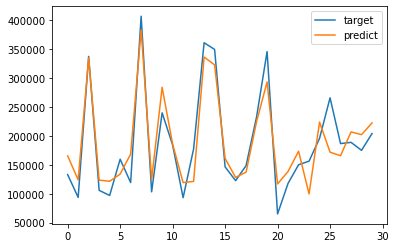

In [65]:
result[:30].plot()

200812

In [66]:
# XGBRegressor로 학습해 보기
from xgboost import XGBRegressor

In [67]:
xgb_reg = XGBRegressor()

In [68]:
xgb_reg.fit(X_train ,y_train)

ValueError: feature_names must be string, and may not contain [, ] or <

In [69]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'households',
       'median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'rooms_per_hh', 'bedrooms_per_hh',
       'population_per_hh'],
      dtype='object')

In [70]:
X_train.columns = ['longitude', 'latitude', 'housing_median_age', 'households',
       'median_income', 'ocean_proximity_1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'rooms_per_hh', 'bedrooms_per_hh',
       'population_per_hh']

X_test.columns = ['longitude', 'latitude', 'housing_median_age', 'households',
       'median_income', 'ocean_proximity_1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'rooms_per_hh', 'bedrooms_per_hh',
       'population_per_hh']

In [71]:
xgb_reg.fit(X_train ,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
xgb_mse = mean_squared_error(y_test, xgb_reg.predict(X_test))
np.sqrt(xgb_mse)

43757.36344977261

In [76]:
# grid search 적용
xgb_params = {
    'n_estimators' : [100, 300],
    'learning_rate': [0.1, 0.2]
}

grid_xgb = GridSearchCV(xgb_reg, param_grid=xgb_params, cv=3,
                       scoring='neg_mean_squared_error', n_jobs = -1)

In [77]:
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [78]:
xgb_mse = mean_squared_error(y_test, xgb_reg.predict(X_test))
np.sqrt(xgb_mse)

43757.36344977261

In [79]:
# 자체검증 추가
grid_xgb.fit(X_train, y_train, eval_set = [(X_test, y_test)],
            eval_metric = 'logloss')

[0]	validation_0-rmse:193363.93750
[1]	validation_0-rmse:175896.68750
[2]	validation_0-rmse:160196.60938
[3]	validation_0-rmse:146282.21875
[4]	validation_0-rmse:133854.09375
[5]	validation_0-rmse:122749.27344
[6]	validation_0-rmse:112909.85938
[7]	validation_0-rmse:104307.54688
[8]	validation_0-rmse:96658.57031
[9]	validation_0-rmse:89994.19531
[10]	validation_0-rmse:84093.61719
[11]	validation_0-rmse:78991.23438
[12]	validation_0-rmse:74551.74219
[13]	validation_0-rmse:70650.85156
[14]	validation_0-rmse:67368.32031
[15]	validation_0-rmse:64549.13672
[16]	validation_0-rmse:62101.30469
[17]	validation_0-rmse:59916.85156
[18]	validation_0-rmse:57918.62500
[19]	validation_0-rmse:56217.40625
[20]	validation_0-rmse:54692.97266
[21]	validation_0-rmse:53291.54297
[22]	validation_0-rmse:52343.35156
[23]	validation_0-rmse:51356.19141
[24]	validation_0-rmse:50630.55469
[25]	validation_0-rmse:49964.46875
[26]	validation_0-rmse:49344.70703
[27]	validation_0-rmse:48797.76172
[28]	validation_0-rmse

[231]	validation_0-rmse:42292.66406
[232]	validation_0-rmse:42283.60156
[233]	validation_0-rmse:42295.16406
[234]	validation_0-rmse:42283.67969
[235]	validation_0-rmse:42283.93750
[236]	validation_0-rmse:42279.49219
[237]	validation_0-rmse:42280.11719
[238]	validation_0-rmse:42280.97656
[239]	validation_0-rmse:42275.87109
[240]	validation_0-rmse:42271.52344
[241]	validation_0-rmse:42273.90625
[242]	validation_0-rmse:42277.20312
[243]	validation_0-rmse:42275.70312
[244]	validation_0-rmse:42272.15234
[245]	validation_0-rmse:42274.97266
[246]	validation_0-rmse:42272.87891
[247]	validation_0-rmse:42269.53125
[248]	validation_0-rmse:42272.86719
[249]	validation_0-rmse:42286.17188
[250]	validation_0-rmse:42288.24219
[251]	validation_0-rmse:42285.01172
[252]	validation_0-rmse:42285.48828
[253]	validation_0-rmse:42280.09375
[254]	validation_0-rmse:42277.60156
[255]	validation_0-rmse:42272.51953
[256]	validation_0-rmse:42270.03906
[257]	validation_0-rmse:42264.79688
[258]	validation_0-rmse:4225

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [80]:
xgb_mse = mean_squared_error(y_test, xgb_reg.predict(X_test))
np.sqrt(xgb_mse)

43757.36344977261

## Incremental Learning
* 배치 학습  
여태까지 한 것 다 배치 학습이다.  
    - 가용한 데이터(train)를 모두 사용하여 훈련
    - 시간과 자원을 많이 소모하므로 보통 오프라인에서 수행
    - 기훈련된 학습 결과(모델)을 시스템에 적용만 함. (업데이트X) -> 오프라인 학습


* 온라인 학습
1 실시간으로 모델 업데이트 할 때, 2 데이터가 너무 클 때  
    - 데이터를 한 개씩 또는 미니배치 단위로 입력받아 훈련
    - 매 학습 단계가 빠르고 비용이 적게 듬.
    
빅데이터 시대의 기술의 핵심은 분산.

In [82]:
from sklearn.linear_model import SGDRegressor

In [83]:
sgd_reg = SGDRegressor(max_iter = 2000, tol=0.001)

In [84]:
sgd_reg.fit(X_train, y_train)

SGDRegressor(max_iter=2000)

In [85]:
# 학습 모델을 파일로 저장
import pickle
filename = 'housing_predict.pkl'

with open(filename, 'wb') as file:
    pickle.dump(sgd_reg, file)  # dump: ~backup

In [86]:
# 파일로부터 학습 모델 읽어오기
with open(filename, 'rb') as file:
    sgd_reg2 = pickle.load(file)

In [88]:
# 그냥 fit은 기존 모델 무시하고, 이 데이터로 새로운 모델 만듦
# partial_fit은 기존 모델에 이 데이터를 반영해서 모델을 업데이트
sgd_reg2.partial_fit(X_test, y_test)

SGDRegressor(max_iter=2000)

In [89]:
mean_squared_error(y_test, sgd_reg.predict(X_test))

1.0218330452612244e+27

In [90]:
mean_squared_error(y_test, sgd_reg2.predict(X_test))

1.2857642297192191e+26